 Design RNN or its variant including LSTM or GRU a) Select a suitable time series dataset.      
Example – predict sentiments based on product reviews b) Apply for prediction 

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

# Explanation:

""" 
            Sequential: A linear stack of layers to build the model.
            Embedding: Converts integer-encoded words into dense vectors (e.g., "cat" → [0.2, -0.5, ...]).
            LSTM: Layer to process sequential data with memory cells and gates.
            Dense: Fully connected layer for classification.
            imdb: Preloaded dataset of movie reviews labeled as positive (1) or negative (0).
            sequence: Utilities for padding sequences to a fixed length. 
"""

# Load dataset
vocab_size = 5000  # Use top 5,000 frequent words
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

"""
            Explanation:
            vocab_size=5000: Restrict vocabulary to the 5,000 most frequent words (reduces noise from rare words).
            imdb.load_data(): Loads the IMDB dataset preprocessed into integer sequences.
            x_train/x_test: Lists of reviews, where each word is replaced by its integer index.
            y_train/y_test: Labels (0 or 1).
"""

# Pad sequences to fixed length (400 words)
max_words = 400
x_train = sequence.pad_sequences(x_train, maxlen=max_words)
x_test = sequence.pad_sequences(x_test, maxlen=max_words)
"""
            Explanation:
            max_words=400: Truncate/pad all reviews to 400 words.
            Shorter reviews are padded with zeros (e.g., [0, 0, ..., 12, 42]).
            Longer reviews are truncated to 400 words.
            Why? Neural networks require fixed-length inputs for batch processing.
"""

# Build LSTM model
model = Sequential(name="LSTM_Sentiment_Analysis")
model.add(Embedding(vocab_size, 32, input_length=max_words))  # Convert word indices to 32D vectors
model.add(LSTM(128, activation='tanh', return_sequences=False))  # 128 LSTM units
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
"""
            Step 1: Embedding Layer:
            vocab_size: 5,000 unique words.
            32: Embedding dimension (each word is a 32-dimensional vector).
            input_length=max_words: Each input sequence has 400 words.
            Purpose: Converts sparse integer-encoded words into dense vectors that capture semantic meaning (e.g., "good" and "great" are closer in vector space).

            Step 2: LSTM Layer:
            128: Number of LSTM units (dimensionality of the hidden state).
            activation='tanh': Hyperbolic tangent activation for gate updates.
            return_sequences=False: Return only the final output (not all timesteps).
            Purpose: Processes the sequence word-by-word, updating its hidden state to capture context.

            Step 3: Dense Layer:
            1: Single neuron for binary classification (positive/negative).
            activation='sigmoid': Squashes output to [0, 1] (probability of positive sentiment).

"""

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
"""
            Explanation:
            loss='binary_crossentropy': Standard loss for binary classification.
            optimizer='adam': Adaptive learning rate optimizer (efficient for RNNs).
            metrics=['accuracy']: Track accuracy during training.
"""

# Train model
history = model.fit(x_train, y_train, 
                   batch_size=64, 
                   epochs=5, 
                   validation_split=0.2)
"""
            Explanation:
            batch_size=64: Update weights after every 64 samples (balance speed/memory).
            epochs=5: Train for 5 full passes over the training data.
            validation_split=0.2: Use 20% of training data for validation (monitor overfitting).
            Output: Training logs show loss/accuracy for training and validation sets.
"""

# Evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


"""
            Explanation:
            evaluate(): Computes loss and accuracy on unseen test data.
            test_acc: Accuracy reflects how well the model generalizes to new reviews.
            Typical Output: ~80-88% accuracy depending on hyperparameters.
"""

C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 123s 384ms/step - accuracy: 0.6171 - loss: 0.6278 - val_accuracy: 0.8380 - val_loss: 0.3714
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 120s 384ms/step - accuracy: 0.8728 - loss: 0.3155 - val_accuracy: 0.8420 - val_loss: 0.3918
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 121s 388ms/step - accuracy: 0.8924 - loss: 0.2798 - val_accuracy: 0.8740 - val_loss: 0.3069
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 128s 409ms/step - accuracy: 0.9135 - loss: 0.2279 - val_accuracy: 0.8740 - val_loss: 0.3297
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 129s 411ms/step - accuracy: 0.9260 - loss: 0.1934 - val_accuracy: 0.8728 - val_loss: 0.3112
Test Accuracy: 87.02%


'\n            Explanation:\n            evaluate(): Computes loss and accuracy on unseen test data.\n            test_acc: Accuracy reflects how well the model generalizes to new reviews.\n            Typical Output: ~80-88% accuracy depending on hyperparameters.\n'

In [2]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Load the IMDb dataset
vocab_size = 10000  # Only top 10,000 words
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

# Pad sequences to ensure equal length
max_length = 200
x_train = pad_sequences(x_train, maxlen=max_length)
x_test = pad_sequences(x_test, maxlen=max_length)

# Build LSTM model
model = Sequential([
    Embedding(vocab_size, 64, input_length=max_length),
    LSTM(64),
    Dense(1, activation='sigmoid')  # Binary sentiment classification
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=3, batch_size=64, validation_data=(x_test, y_test))

# Evaluate model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Epoch 1/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 58s 141ms/step - accuracy: 0.7133 - loss: 0.5177 - val_accuracy: 0.8707 - val_loss: 0.3086
Epoch 2/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 67s 172ms/step - accuracy: 0.9054 - loss: 0.2469 - val_accuracy: 0.8605 - val_loss: 0.3229
Epoch 3/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 67s 171ms/step - accuracy: 0.9377 - loss: 0.1745 - val_accuracy: 0.8684 - val_loss: 0.3592
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - accuracy: 0.8669 - loss: 0.3611
Test Accuracy: 86.84%


782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step


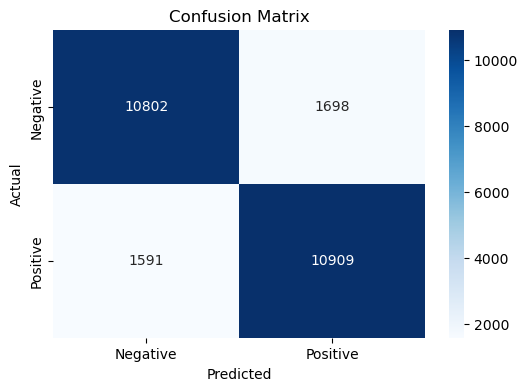

              precision    recall  f1-score   support

    Negative       0.87      0.86      0.87     12500
    Positive       0.87      0.87      0.87     12500

    accuracy                           0.87     25000
   macro avg       0.87      0.87      0.87     25000
weighted avg       0.87      0.87      0.87     25000



In [3]:
# Import required modules
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Predict probabilities
y_pred_prob = model.predict(x_test)
# Convert probabilities to binary class predictions (0 or 1)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Optional: Print classification report
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))
